In this project, we analyse how stock from three different car brands perform. In this analysis we include some visualizations, moving averages, and scatter matrix to observe the correlation between the 3 stock that belong to the same industry. We observe a period of 5 years (01/01/12 to 01/01/17).

#### Import lib.

In [69]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

#### Get Data, ticker TSLA, F and GM (NASDAQ) 


Using pandas_datareader, we obtain the historical stock information from 01/01/12 to 01/01/17.

In [79]:
import pandas_datareader

import datetime

import pandas_datareader.data as web

 

start = datetime.datetime(2012,1,1)

end = datetime.datetime(2017,1,1)

#### Create variables tesla, ford and gm (we use corresponent ticker and as API we use Yahoo since Google was discontinued).

In [71]:
tesla = web.DataReader("TSLA","yahoo",start,end)

ford = web.DataReader("F","yahoo",start,end)

gm = web.DataReader("GM","yahoo",start,end)

In [15]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,5.900,5.530,5.788,5.616,4640500,5.616
2012-01-04,5.734,5.500,5.642,5.542,3150500,5.542
2012-01-05,5.586,5.370,5.552,5.424,5027500,5.424
2012-01-06,5.558,5.282,5.440,5.382,4931500,5.382
2012-01-09,5.498,5.224,5.400,5.450,4485000,5.450


## Data visualisation

#### Linear plot of the 3 stocks, its open price and include a legend, label.

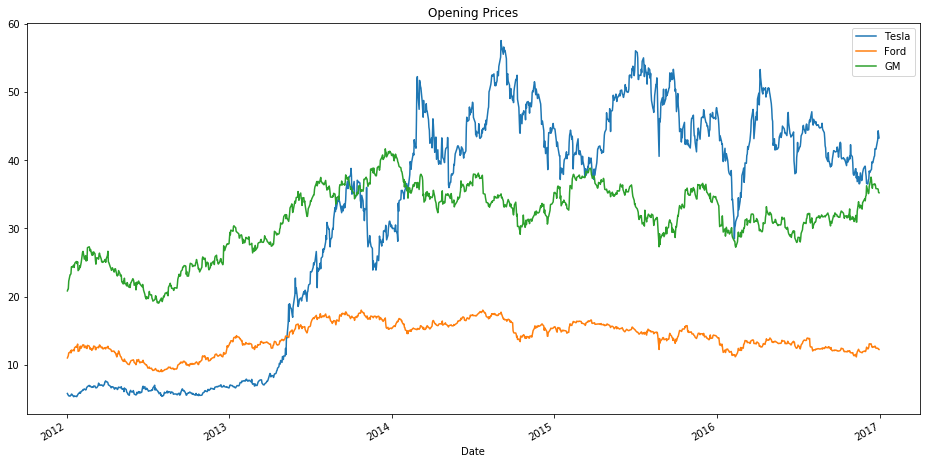

In [72]:
tesla["Open"].plot(label="Tesla",figsize=(16,8),title="Opening Prices")

ford["Open"].plot(label="Ford")

gm["Open"].plot(label="GM")

plt.legend()

We see Tesla grows in a huge way and ford and gm lay flat. In order to understand this graph, we need to think about the total market cap of Tesla which is not only the stock price but also consider the units of stock available. This is because it is not the same having thousands of shares traded at 1 dollar, than only 10 shares at 1000 dollar. However, this information is not in the current data. To calculate that, we need first to calculate "Open price" X "volume traded" and we will obtain the money traded or volume traded. 

#### Create column total volume traded (money traded)

In [73]:
tesla["Total traded"] = tesla["Open"]*tesla["Volume"]

ford["Total traded"] = ford["Open"]*ford["Volume"]

gm["Total traded"] = gm["Open"]*gm["Volume"] 

#### Linear plot total Volume Traded with time index

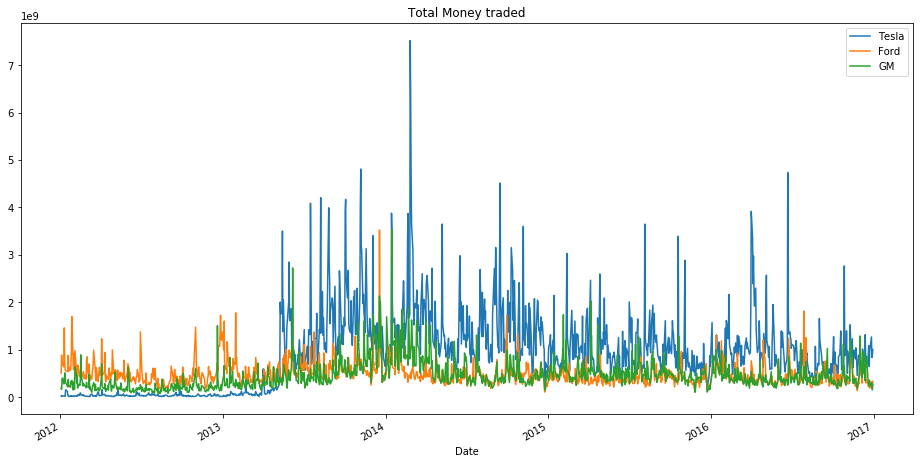

In [81]:

tesla["Total traded"].plot(label="Tesla", figsize=(16,8),title="Total Money traded")

ford["Total traded"].plot(label="Ford")

gm["Total traded"].plot(label="GM")

plt.legend()

We see Tesla is not so different to ford and gm besides a big spike which means a lot of money was traded on that day, around 2014. In definitive, the price for an indivudal stock is not representative of the market cap of a company, the data we are provided are only open, close price and volume.

To know what happened on the day with a spike for Tesla in money traded, we look the max for column and to obtain in which dates that happened, we use arguments (arg) and obtain the day.

In [84]:
tesla["Total traded"].max()

7516791000.0

In [75]:
tesla["Total traded"].argmax()

538

#### Linear plot volume of stock traded every day.

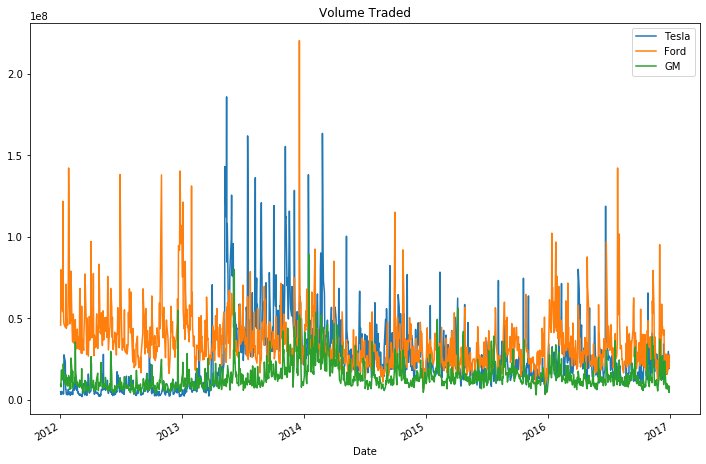

In [80]:
tesla["Volume"].plot(label="Tesla",figsize=(12,8),title="Volume Traded")

ford["Volume"].plot(label="Ford")

gm["Volume"].plot(label="GM")

plt.legend()

We see Ford gad a considerable spike end 2013 with max trading for Ford. Again, in order to know what happened on that day we look the max for column "Volume" and we obtain, as a result, that the stock traded was $220M.

And to obtain in which dates that happened, we ise arguments. (arg) and obtain the day.

In [82]:
ford["Volume"].max()

220363000.0

In [83]:
ford["Volume"].argmax()

493

We searched the obtained date on the news and saw that Ford said the the launch of new products would cut next’s years profits and that caused a big sell and the shares also fell. In definitive, the pick on the volume traded was a big selloff.

In order to see if the price of the shares also fell, we can plot Ford’s opening price (make it bigger size (20,6)) and we see that day there is a drop on the price although not so big as the spike in volume traded.

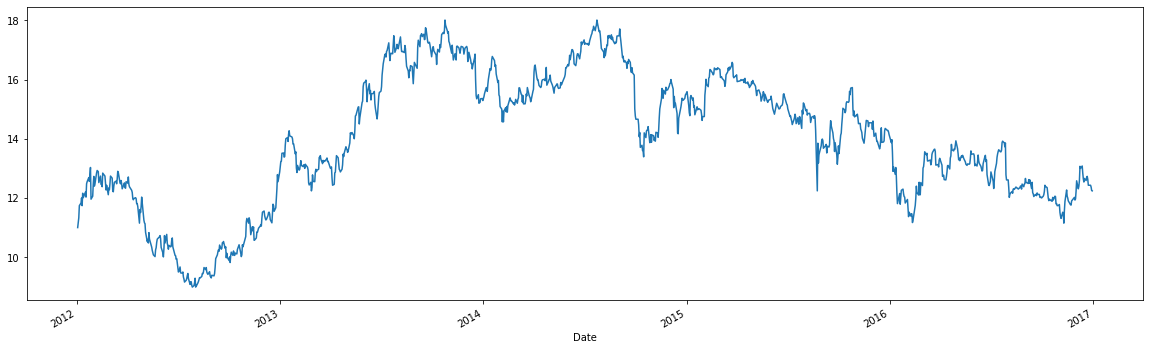

In [36]:
ford["Open"].plot(figsize=(20,6))

####  Plot moving averages(MA):

We plot MA50 (window or rolling 50days) and MA200 (more use as a macro trend because it’s a really large window) for GM. The Moving averages are composed by the Open price and its average. 
For clarity, we create a column for each moving average and plot togehter with the open price column for GM.

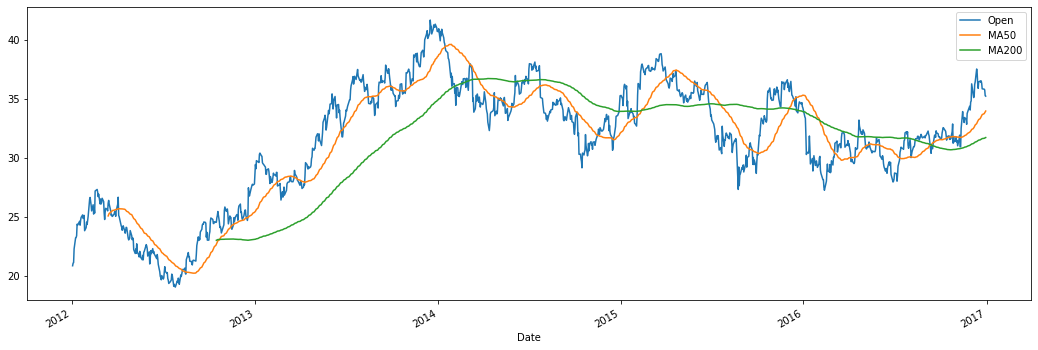

In [38]:
gm["MA50"] = gm["Open"].rolling(50).mean()

gm["MA200"] = gm["Open"].rolling(200).mean()

gm[["Open", "MA50", "MA200"]].plot(figsize=(18,6))

## Relationship between stocks 

It might exist a relationship between stocks given that they belong to the same industry. We can easily do this through a scatter matrix plot of all opening prices. We may need to arrange columns into a single data frame like open for tesla, gm and f into one dataset called Car Companies.  We can see the columns are now concatenated and we have three columns one after other of open open open. For clarity, we also give a name to these 3 columns called open.

In [87]:
from pandas.plotting import scatter_matrix

car_comp = pd.concat([tesla ["Open"],gm["Open"],ford["Open"]],axis=1)

car_comp.head()

car_comp.columns = ["Open Tesla", "Open GM", "Open Ford"]

In [85]:
car_comp.head()

,Open Tesla,Open GM,Open Ford
Date,,,
2012-01-03,5.788,20.830000,11.00
2012-01-04,5.642,21.049999,11.15
2012-01-05,5.552,21.100000,11.33
2012-01-06,5.440,22.260000,11.74
2012-01-09,5.400,23.200001,11.83


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c16e550>,
      dtype=object)

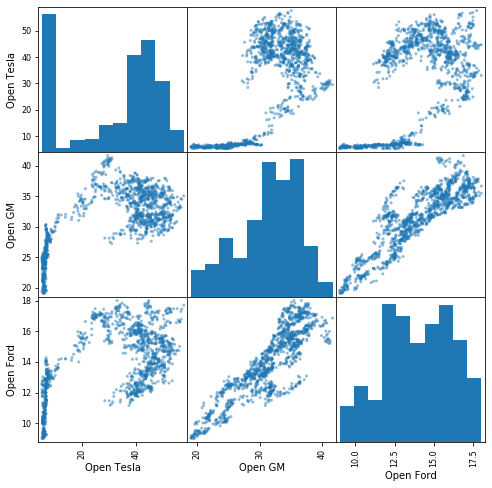

In [88]:
scatter_matrix(car_comp,figsize=(8,8))

We see there is a clear positive correlation between GM and Ford. With Tesla it has a different behaviour which is logical as we saw in the lineal open plot, that Tesla was jumping higher.

In order to have a better level of comparison we add an alpha variable. Alpha is 0.2 for instance given that we are dealing with many data points. The plots will appear more stack on each other.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11aabf990>,
      dtype=object)

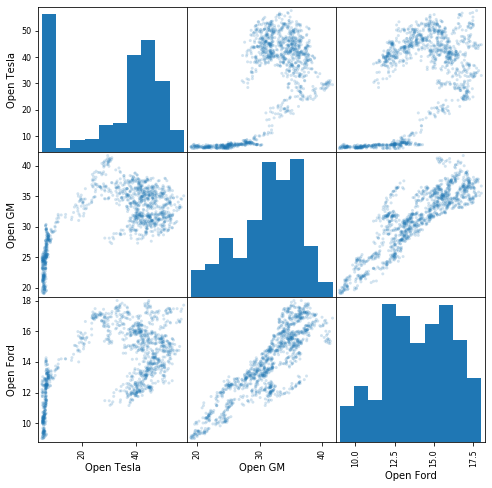

In [40]:
scatter_matrix(car_comp,figsize=(8,8), alpha=0.2)